In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [2]:
#from IPython.display import SVG
#from graphviz import Source
#from IPython.display import display
#from IPython.display import HTML
#style = "<style>svg{width: 50% !important; height: 60% !important;} </style>"
#HTML(style)

In [5]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
#titanic_data.head()
#titanic_data.isnull().sum() #оч много NaN в колонках Age и Cabin
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived

In [7]:
X = pd.get_dummies(X) #преобразовал строковые переменные в числовые (sex)
X = X.fillna(X.Age.median())
#X.isnull().sum()
#X.head()

In [8]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf.fit(X, y)
clf.score(X, y)

0.8226711560044894

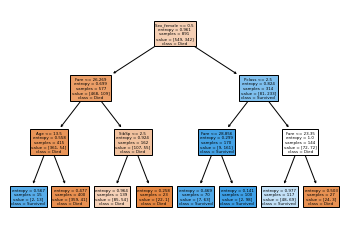

In [9]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);
plt.show()

In [10]:
#graph = Source(tree.export_graphviz(clf, out_file=None, 
#                                    feature_names=list(X), 
#                                    class_names=['Died', 'Survived'], 
#                                    filled=True))
#display(SVG(graph.pipe(format='svg')))

# Делим на train и test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [13]:
clf.score(X_test, y_test)

0.8203389830508474

# Подбираем оптимальную глубину

In [12]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])
    
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


<AxesSubplot:xlabel='max_depth'>

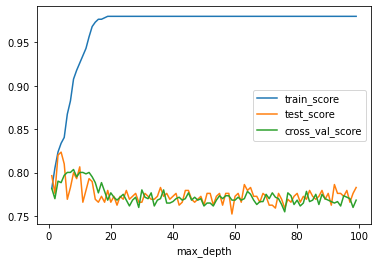

In [13]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score', 'cross_val_score'], legend = True)

In [14]:
#второй вариант через melt
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score','cross_val_score'], 
                          var_name='set_type', value_name='score')
scores_data_long.query("set_type =='cross_val_score'").head(20)
#sns.lineplot(x='max_depth', y='score', hue = 'set_type', data = scores_data_long)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.800350


In [15]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7966101694915254

# Используем GridSearchCV для поиска оптимальных параметров

In [16]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}
grid_search_cv_clf = GridSearchCV(estimator=clf, param_grid=parametrs, cv=5)

In [17]:
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [18]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7661016949152543

In [19]:
y_pred = best_clf.predict(X_test)
print(precision_score(y_test, y_pred), recall_score(y_test, y_pred))

0.7931034482758621 0.575


# можно еще RandomizedSearchCV

In [20]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}
random_search_cv_clf = RandomizedSearchCV(estimator=clf, param_distributions=parametrs, cv=5)
random_search_cv_clf.fit(X_train, y_train)
random_search_cv_clf.best_params_

{'max_depth': 11, 'criterion': 'entropy'}

# чето пока что непонятное


In [21]:
#best_clf.predict_proba(X_test) #для каждого пассажира предсказана вероятность отнесения его к отриц и полож классу
#отсечение идет по 0.5, но, возможно, порог должен быть менее консервативный 

<AxesSubplot:>

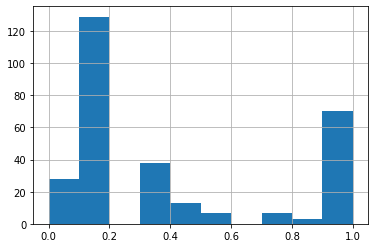

In [22]:
y_predicted_prob = best_clf.predict_proba(X_test)
pd.Series(y_predicted_prob[:,1]).hist() #оставили колонку с вер отнесения к положительному классу
#куда отнести людей, у которых вероятность от 0.5 до 0.6? 
#можем увеличить precision, если поставим границу отсечения на 0.8, например
#но тогда очень падает recall

In [23]:
y_pred = np.where(y_predicted_prob[:,1] > 0.7, 1, 0)
print(precision_score(y_test, y_pred), recall_score(y_test, y_pred))
#чтобы определиться, какую отсечку выбрать, чтобы найти баланс между ошибками 1 и 2 рода
#для этого используется ROC кривая

0.8375 0.5583333333333333


In [24]:
confusion_matrix(y_test, y_pred)

array([[162,  13],
       [ 53,  67]], dtype=int64)

# ROC кривая

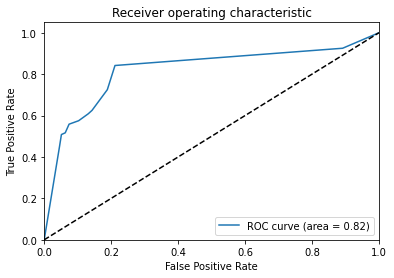

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")